# Proyek Analisis Data: Bike Sharing Dataset
- Nama: Akbar Ihsanul Ahadin
- Email: bungzhu.noob@gmail.com
- Id Dicoding: itsaiml

## Menentukan Pertanyaan Bisnis

* Pada jam berapa terdapat penyewa paling banyak dan paling sedikit? <br>
* Pada musim apa yang terdapat penyewa sepeda terbanyak <br>

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [4]:
day_df = pd.read_csv("day-data.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
hour_df = pd.read_csv("hour-data.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [6]:
hour_df.info()
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex:

In [7]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [12]:
print("Jumlah data duplikasi: ", hour_df.duplicated().sum())
print("Jumlah data duplikasi: ", day_df.duplicated().sum())


Jumlah data duplikasi:  0
Jumlah data duplikasi:  0


In [24]:
day_df.describe()

,instant,temp,atemp,humidity,wind_speed,casual,registered,count_cr
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,0.495385,0.474354,6278.940629,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,0.183051,0.162961,1424.290951,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,0.337083,0.337842,5200.000000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,0.498333,0.486733,6266.670000,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,0.655417,0.608602,7302.085000,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,0.861667,0.840896,9725.000000,0.507463,3410.000000,6946.000000,8714.000000


In [25]:
hour_df.describe()

,instant,hours,temp,atemp,humidity,wind_speed,casual,registered,count_cr
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,11.546752,0.496987,0.475775,6272.288394,0.190098,35.676218,153.786869,189.463088
std,5017.0295,6.914405,0.192556,0.171850,1929.298341,0.122340,49.305030,151.357286,181.387599
min,1.0000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,6.000000,0.340000,0.333300,4800.000000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,12.000000,0.500000,0.484800,6300.000000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,18.000000,0.660000,0.621200,7800.000000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,23.000000,1.000000,1.000000,10000.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

* Menghapus kolom *instant* karena tidak ada hubungannya dan *workingday* sudah terwakili oleh *weekday*.
* Menggunakan tipe data *int* menjadi *category* pada kolom *season*, *mnth*, *holiday*, *weekday*, *weathersit*.<br>
* Handling tipe data *dteday* yang tadinya *object* menjadi *datetime*.
* Mengganti nama kolom agar lebih mudah dibaca.
* Mengkonversi isi kolom agar mudah dipahami.
* Membuat kolom baru bernama *category_days* yang menunjukan isi kolom tersebut *weekend* atau *weekdays*.

In [13]:
hour_df.drop(['workingday'], axis = 1, inplace= True)
day_df.drop(['workingday'], axis = 1, inplace= True)


In [14]:
columns = ['season', 'mnth', 'holiday', 'weekday', 'weathersit']

for column in columns:
    day_df[column] =  day_df[column].astype("category")
    hour_df[column] =  hour_df[column].astype("category")


In [26]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])


#### Rename

In [30]:
day_df.rename(columns={'yr':'year','mnth':'month','weekday':'one_of_week', 'weathersit':'weather_situation', 'windspeed':'wind_speed','cnt':'count_cr','hum':'humidity'},inplace=True)

In [31]:
hour_df.rename(columns={'yr':'year','hr':'hours','mnth':'month','weekday':'one_of_week', 'weathersit':'weather_situation','windspeed':'wind_speed','cnt':'count_cr','hum':'humidity'},inplace=True)

In [32]:
day_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)
hour_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)

day_df.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)
hour_df.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)

day_df.weather_situation.replace((1,2,3,4), ('Clear','Misty','Light_rainsnow','Heavy_rainsnow'), inplace=True)
hour_df.weather_situation.replace((1,2,3,4), ('Clear','Misty','Light_rainsnow','Heavy_rainsnow'), inplace=True)

day_df.one_of_week.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)
hour_df.one_of_week.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)

day_df.year.replace((0,1), ('2011','2012'), inplace=True)
hour_df.year.replace((0,1), ('2011','2012'), inplace=True)

day_df['humidity'] = day_df['humidity']*100
hour_df['humidity'] = hour_df['humidity']*100

In [33]:
one_of_week = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
def get_category_days(one_of_week):
    if one_of_week in ["Saturday", "Sunday"]:
        return "weekend"
    else:
        return "weekdays"

hour_df["category_days"] = hour_df["one_of_week"].apply(get_category_days)
day_df["category_days"] = day_df["one_of_week"].apply(get_category_days)

In [34]:
def classify_humidity(humidity):
    if humidity < 45:
        return "Terlalu kering"
    elif humidity >= 45 and humidity < 65:
        return "Ideal"
    else:
        return "Terlalu Lembab"

hour_df["humidity_category"] = hour_df["humidity"].apply(classify_humidity)
day_df["humidity_category"] = day_df["humidity"].apply(classify_humidity)

* Menghapus kolom *instant* dan *workingday*.
* tipe data pada kolom *dteday* sudah berubah menjadi *datetime*.
* tipe data *int* pada *season*, *mnth*, *holiday*, *weekday*, *workingday*, *weathersit* sudah berubah menjadi tipe data *category*.
* Mengganti nama kolom agar lebih mudah dibaca.
* Mengkonversi isi kolom agar mudah dipahami.
* Membuat kolom baru bernama *category_days* yang berisi *weekend* atau *weekdays*.

## Exploratory Data Analysis (EDA)

### Explore Data hour_df


In [35]:
hour_df.describe(include="all")

<ipython-input-35-55b8ff84265d>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  hour_df.describe(include="all")


,instant,dteday,season,year,month,hours,holiday,one_of_week,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_cr,category_days,humidity_category
count,17379.0000,17379,17379,17379,17379,17379.000000,17379.0,17379,17379,17379.000000,17379.000000,1.737900e+04,17379.000000,17379.000000,17379.000000,17379.000000,17379,17379
unique,NaN,731,4,2,12,NaN,2.0,7,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2
top,NaN,2011-01-01 00:00:00,Fall,2012,May,NaN,0.0,Saturday,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,weekdays,Terlalu Lembab
freq,NaN,24,4496,8734,1488,NaN,16879.0,2512,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12365,17357
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,NaN,NaN,NaN,11.546752,NaN,NaN,NaN,0.496987,0.475775,6.272288e+07,0.190098,35.676218,153.786869,189.463088,NaN,NaN
std,5017.0295,NaN,NaN,NaN,NaN,6.914405,NaN,NaN,NaN,0.192556,0.171850,1.929298e+07,0.122340,49.305030,151.357286,181.387599,NaN,NaN
min,1.0000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.020000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,NaN,NaN
25%,4345.5000,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,0.340000,0.333300,4.800000e+07,0.104500,4.000000,34.000000,40.000000,NaN,NaN


- Berdasarkan data di atas, terdapat informasi jumlah pelanggan sebanyak **17.379**.
- Berdasarkan data yang ditampilkan range antara jam 00.00 - 23.59, terdapat rata-rata penyewaan sepeda terjadi pada jam 11.54 dengan standar deviasinya sebesar **6.91**
  


In [36]:
hour_df.groupby(by="hours").agg({
    "count_cr": ["sum"]
})

,count_cr
,sum
hours,
0,39130
1,24164
2,16352
3,8174
4,4428
5,14261
6,55132
7,154171


- Dapat diketahui bahwa pelanggan yang memilliki banyak menyewa sepeda terjadi pada jam **17.00** sedangkan penyewaan sepeda yang paling sedikit dimiliki pada jam **04.00**

### Explore Data day_df


In [37]:
day_df.describe(include="all")


<ipython-input-37-51e59b52191b>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day_df.describe(include="all")


,instant,dteday,season,year,month,holiday,one_of_week,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_cr,category_days,humidity_category
count,731.000000,731,731,731,731,731.0,731,731,731.000000,731.000000,7.310000e+02,731.000000,731.000000,731.000000,731.000000,731,731
unique,NaN,731,4,2,12,2.0,7,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2
top,NaN,2011-01-01 00:00:00,Fall,2012,Jan,0.0,Sunday,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,weekdays,Terlalu Lembab
freq,NaN,1,188,366,62,710.0,105,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,521,730
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,6.278941e+07,0.190486,848.176471,3656.172367,4504.348837,NaN,NaN
std,211.165812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.183051,0.162961,1.424291e+07,0.077498,686.622488,1560.256377,1937.211452,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000e+00,0.022392,2.000000,20.000000,22.000000,NaN,NaN
25%,183.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,5.200000e+07,0.134950,315.500000,2497.000000,3152.000000,NaN,NaN


- Terdapat informasi jumlah pelanggan sebanyak **17.379** orang di musim 1-4 memiliki top.

In [39]:
day_df.groupby(by="season").count_cr.sum().sort_values(ascending=False).reset_index().head(10)

,season,count_cr
0,Fall,1061129
1,Summer,918589
2,Winter,841613
3,Spring,471348


- Dapat diketahui bahwa season **Fall** merupakan musim yang memiliki jumlah terbanyak.


In [38]:
day_df.groupby(by="year").agg({
    "registered": ["sum"],
    "casual": ["sum"]
})

,registered,casual
,sum,sum
year,,
2011,995851,247252
2012,1676811,372765


Dapat diketahui seseorang yang sudah mempunyai member pada tahun 2011 sebanyak **995.851** sedangkan yang belum menjadi member sebanyak **247.252**

## Visualization & Explanatory Analysis

* Pada jam berapa terdapat penyewa paling banyak dan paling sedikit? <br>
* Pada musim apa yang terdapat penyewa sepeda terbanyak? <br>

### Pertanyaan 1: Pada jam berapa terdapat penyewa paling banyak dan paling sedikit?

In [40]:
sum_order_items_df = hour_df.groupby("hours").count_cr.sum().sort_values(ascending=False).reset_index()


<ipython-input-48-75718c3802ec>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="hours", y="count_cr", data=sum_order_items_df.head(5), palette=["#D3D3D3", "#D3D3D3", "#38A63C", "#D3D3D3", "#D3D3D3"], ax=ax[0])
<ipython-input-48-75718c3802ec>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="hours", y="count_cr", data=sum_order_items_df.sort_values(by="hours", ascending=True).head(5), palette=["#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3","#A13030"], ax=ax[1])


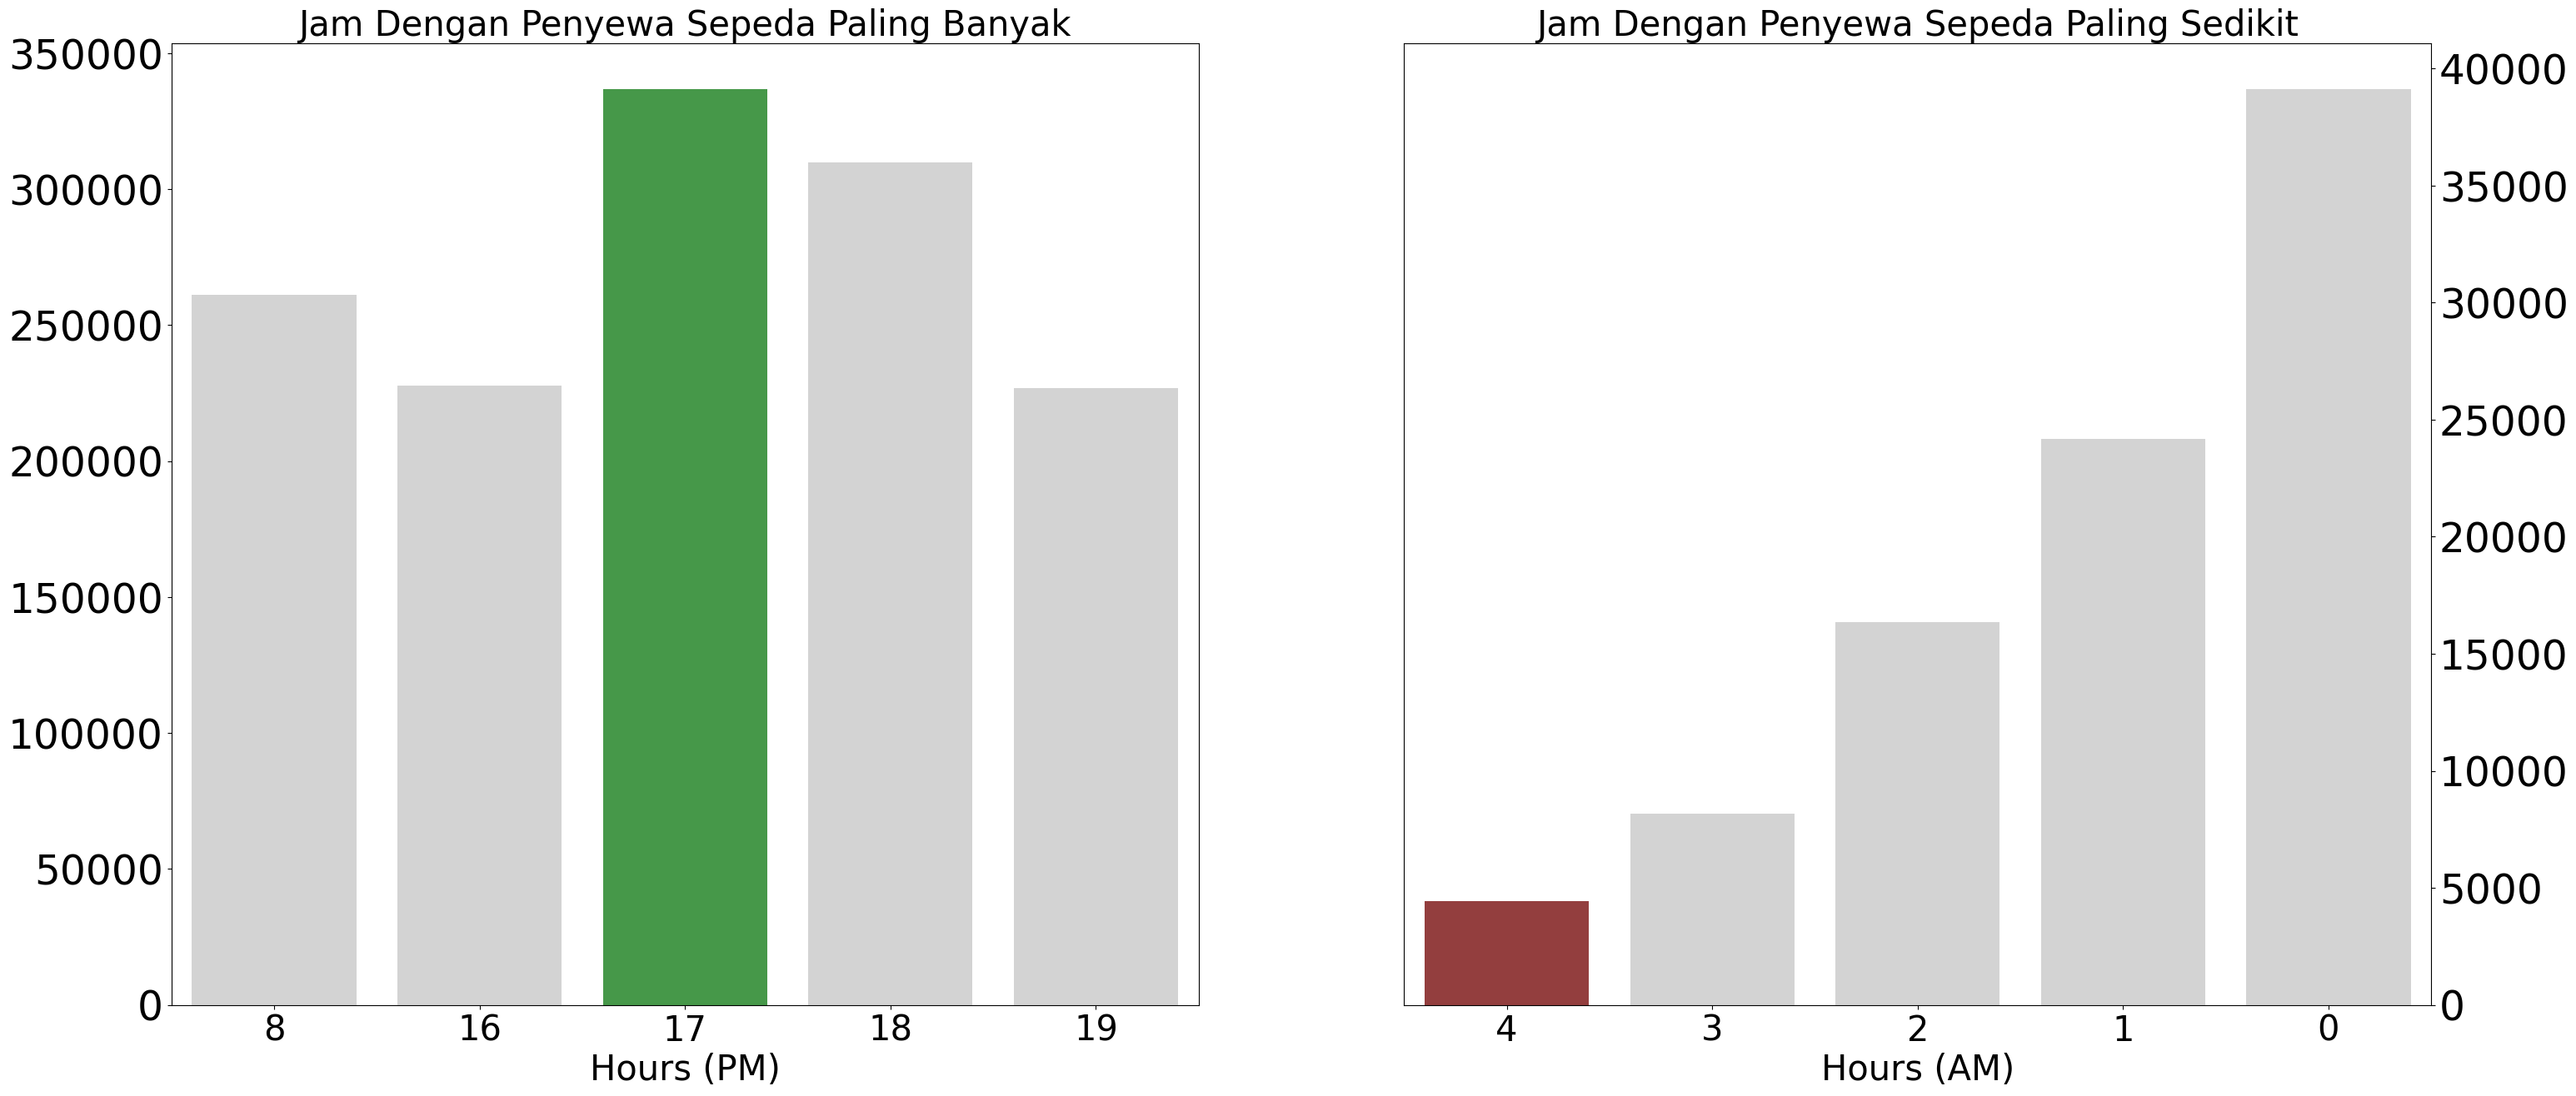

In [48]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(35, 15))

sns.barplot(x="hours", y="count_cr", data=sum_order_items_df.head(5), palette=["#D3D3D3", "#D3D3D3", "#38A63C", "#D3D3D3", "#D3D3D3"], ax=ax[0])

ax[0].set_ylabel(None)
ax[0].set_xlabel("Hours (PM)", fontsize=30)
ax[0].set_title("Jam Dengan Penyewa Sepeda Paling Banyak", loc="center", fontsize=30)
ax[0].tick_params(axis='y', labelsize=35)
ax[0].tick_params(axis='x', labelsize=30)

sns.barplot(x="hours", y="count_cr", data=sum_order_items_df.sort_values(by="hours", ascending=True).head(5), palette=["#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3","#A13030"], ax=ax[1])

ax[1].set_ylabel(None)
ax[1].set_xlabel("Hours (AM)",  fontsize=30)
ax[1].set_title("Jam Dengan Penyewa Sepeda Paling Sedikit", loc="center", fontsize=30)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].tick_params(axis='y', labelsize=35)
ax[1].tick_params(axis='x', labelsize=30)

plt.show()

- Dapat dilihat bahwa penyewaan sepeda paling banyak digunakan pada jam **17:00** sekitar **336.860** penyewaan. Dan, Penyewaan pada jam **04:00** merupakan produk yang paling sedikit terjual sekitar **4.428** penyewaan.

### Pertanyaan 2: Pada musim apa yang terdapat penyewa sepeda terbanyak?

<ipython-input-47-fa61e0f20303>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


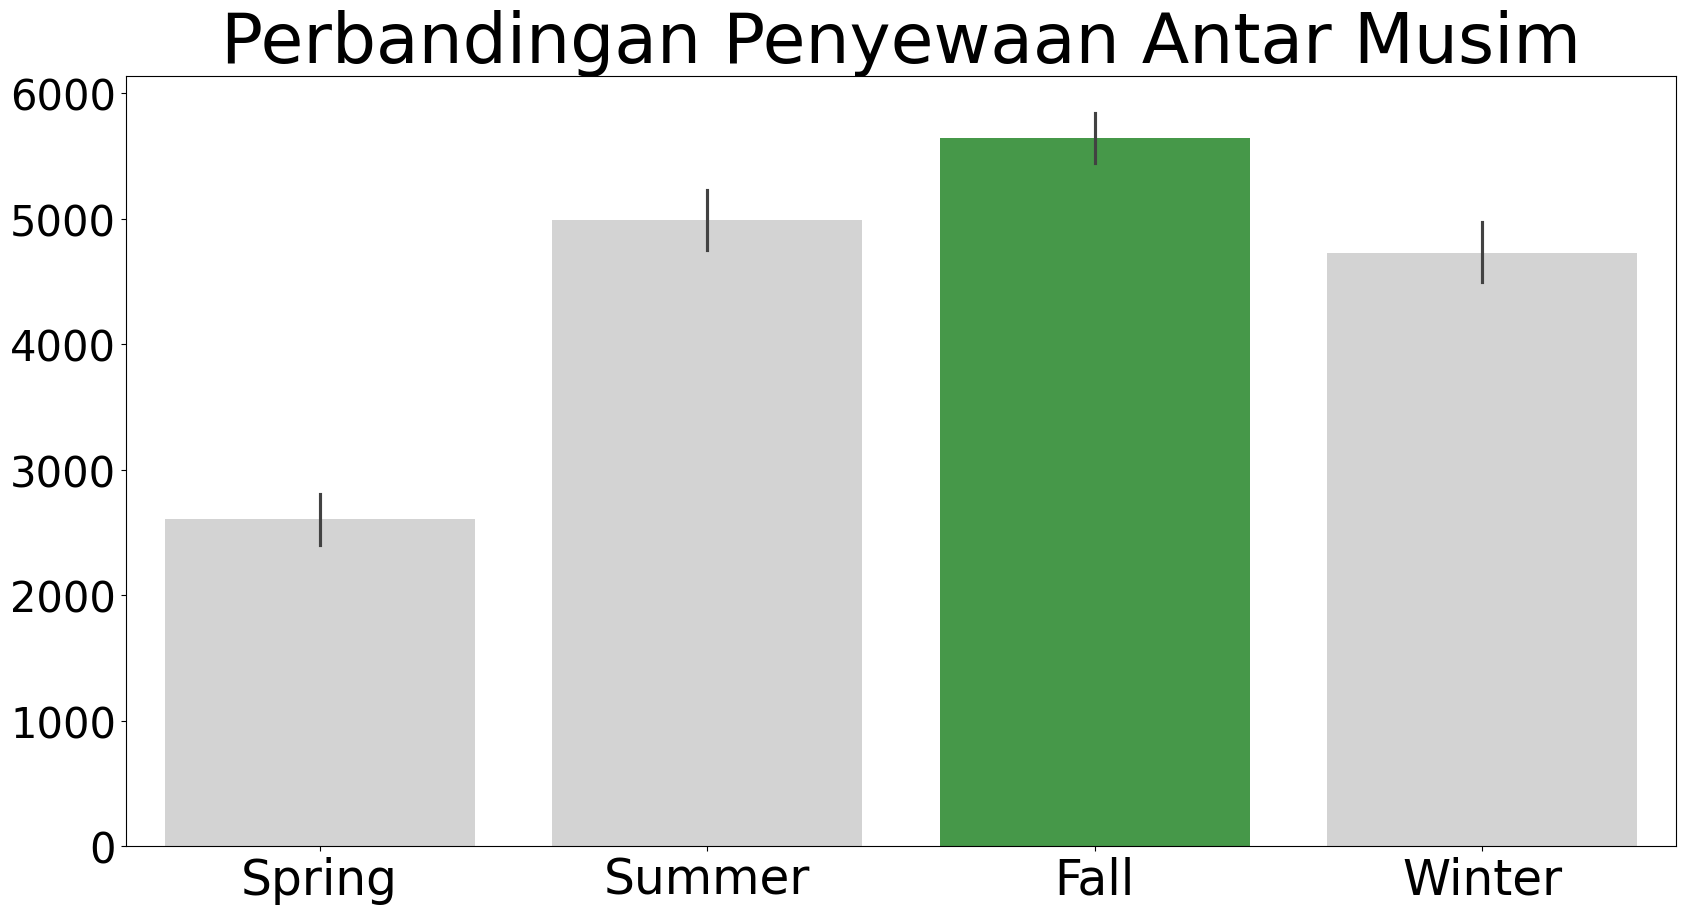

In [47]:
colors = ["#D3D3D3", "#D3D3D3", "#38A63C", "#D3D3D3"]

fig, ax = plt.subplots(figsize=(20, 10))

sns.barplot(
        y="count_cr",
        x="season",
        data=day_df.sort_values(by="season", ascending=False),
        palette=colors,
        ax=ax
    )
ax.set_title("Perbandingan Penyewaan Antar Musim", loc="center", fontsize=50)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.tick_params(axis='x', labelsize=35)
ax.tick_params(axis='y', labelsize=30)

plt.show()

- Dapat dilihat bahwa, Musim yang paling banyak disewa ialah pada ***Fall*** (Musim Gugur) dengan total penyewaan pada musim gugur sebanyak **1.061.129** penyewaan  

## Conclusion

Pertanyaan:<br>
 - Pada jam berapa terdapat penyewa paling banyak dan paling sedikit?
 - Pada musim apa yang terdapat penyewa sepeda terbanyak?

- **Conclution Pertanyaan 1:** Berdasarkan data di atas, penyewaan sepeda paling banyak digunakan pada jam **17:00**. Dan, Penyewaan pada jam **04:00** merupakan produk yang paling sedikit terjual.  
<br>
- **Conclution Pertanyaan 2:** - Dapat dilihat dari data di atas, bahwa, Musim yang paling banyak disewa ialah pada ***Fall*** (Musim Gugur) dengan total penyewaan pada musim gugur sebanyak **1.061.129** penyewaan.

## Menerapkan Teknik Analysis Lanjutan

### RFM Analysis
Digunakan untuk memahami perilaku pelanggan dari tiga faktor utama:
* **Recency** (*seberapa baru pelanggan dalam berinteraksi dengan bisnis*)
* **Frequency** (*seberapa banyaknya pelanggan dalam melakukan interaksi*)
* **Monetary** (*seberapa banyak uang yang pelanggan gunakan*)

In [43]:
current_date = max(hour_df['dteday'])
rfm_df = hour_df.groupby('registered').agg({
    'dteday': lambda x: (current_date - x.max()).days,  # Recency
    'instant': 'count',  # Frequency
    'count_cr': 'sum'  # Monetary
}).reset_index()

rfm_df.columns = ['registered', 'Recency', 'Frequency', 'Monetary']

print(rfm_df.head())

   registered  Recency  Frequency  Monetary
0           0       38         24        35
1           1        0        201       294
2           2        1        245       648
3           3        0        294      1154
4           4        3        307      1602
